In [2]:
# libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn



In [3]:
train = pd.read_csv('data/mnist_train.csv')
test = pd.read_csv('data/mnist_test.csv')

train_labels = train.iloc[:, 0].values  
train_pixels = train.iloc[:, 1:].values 

test_labels = test.iloc[:, 0].values  
test_pixels = test.iloc[:, 1:].values 

train_pixels = train_pixels / 255.0
test_pixels = test_pixels / 255.0


train_pixels_tensor = torch.tensor(train_pixels, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels, dtype=torch.long)
test_pixels_tensor = torch.tensor(test_pixels, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long)

train_dataset = TensorDataset(train_pixels_tensor, train_labels_tensor)
test_dataset = TensorDataset(test_pixels_tensor, test_labels_tensor)

batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)



In [15]:
model = nn.Sequential(
    nn.Linear(28*28, 128),  
    nn.ReLU(),            
    nn.Linear(128, 10)     
)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

loss_history = []

# Training Loop
epochs = 30
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()  
        images = images.view(-1, 28*28)  
        outputs = model(images)  
        loss = criterion(outputs, labels)  
        loss.backward()  
        optimizer.step()  
        total_loss += loss.item()
    
    average_loss = total_loss / len(train_loader)
    loss_history.append(average_loss)
    
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {average_loss:.4f}")

# Evaluate on test set after training
model.eval()
correct = 0
total = 0
test_loss = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28*28)  
        outputs = model(images)  
        loss = criterion(outputs, labels)  
        test_loss += loss.item()  
        _, predicted = torch.max(outputs, 1)  
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

average_test_loss = test_loss / len(test_loader)
accuracy = 100 * correct / total


print(f"Test Loss: {average_test_loss:.4f}, Test Accuracy: {accuracy:.2f}%")


Epoch 1/30, Train Loss: 0.8872
Epoch 2/30, Train Loss: 0.3700
Epoch 3/30, Train Loss: 0.3084
Epoch 4/30, Train Loss: 0.2766
Epoch 5/30, Train Loss: 0.2524
Epoch 6/30, Train Loss: 0.2322
Epoch 7/30, Train Loss: 0.2145
Epoch 8/30, Train Loss: 0.1993
Epoch 9/30, Train Loss: 0.1853
Epoch 10/30, Train Loss: 0.1735
Epoch 11/30, Train Loss: 0.1627
Epoch 12/30, Train Loss: 0.1533
Epoch 13/30, Train Loss: 0.1447
Epoch 14/30, Train Loss: 0.1370
Epoch 15/30, Train Loss: 0.1297
Epoch 16/30, Train Loss: 0.1234
Epoch 17/30, Train Loss: 0.1176
Epoch 18/30, Train Loss: 0.1120
Epoch 19/30, Train Loss: 0.1068
Epoch 20/30, Train Loss: 0.1022
Epoch 21/30, Train Loss: 0.0976
Epoch 22/30, Train Loss: 0.0933
Epoch 23/30, Train Loss: 0.0897
Epoch 24/30, Train Loss: 0.0859
Epoch 25/30, Train Loss: 0.0827
Epoch 26/30, Train Loss: 0.0793
Epoch 27/30, Train Loss: 0.0762
Epoch 28/30, Train Loss: 0.0733
Epoch 29/30, Train Loss: 0.0706
Epoch 30/30, Train Loss: 0.0682
Test Loss: 0.0918, Test Accuracy: 97.32%


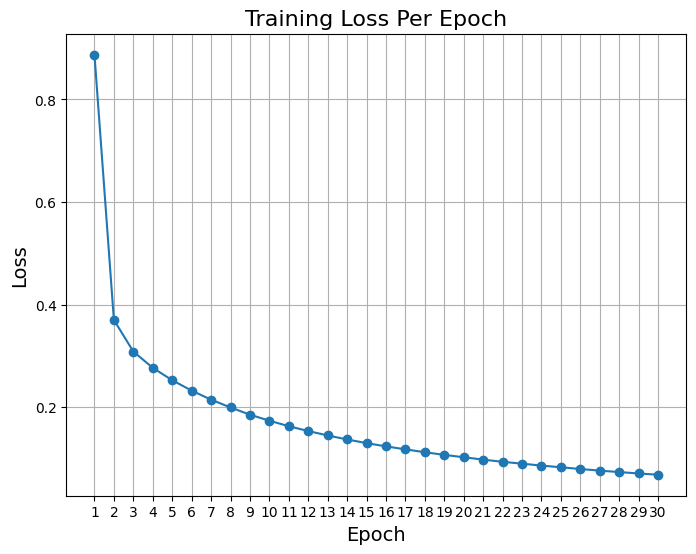

In [16]:
# Plot the loss history
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss_history) + 1), loss_history, marker='o', linestyle='-')
plt.title('Training Loss Per Epoch', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(True)
plt.xticks(range(1, len(loss_history) + 1))
plt.show()
